<a href="https://colab.research.google.com/github/krishtech1602/task-8-Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df=pd.read_csv(url)
print("dataset head:")
print(df.head())

dataset head:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
X=df.select_dtypes(include=['float64','int64'])


In [4]:
inertia=[]
K=range(1,11)
for k in K:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)



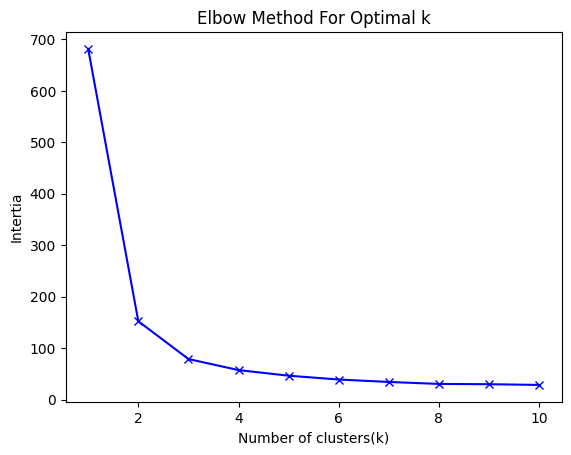

In [5]:
plt.plot(K,inertia,'bx-')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Intertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
k_optimal=3
kmeans=KMeans(n_clusters=k_optimal,random_state=42)
labels=kmeans.fit_predict(X)


In [7]:
df['Cluster']=labels

In [8]:
score=silhouette_score(X,labels)
print(f"Silhouette Score for k={k_optimal}:{score:3f}")

Silhouette Score for k=3:0.551192


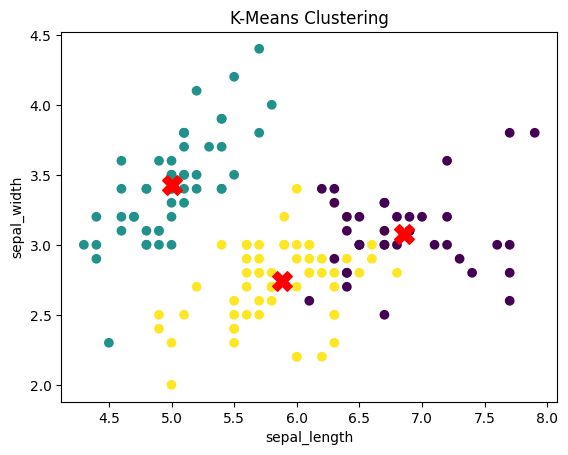

In [9]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("K-Means Clustering")
plt.show()